In [1]:
import pandas as pd

war_df = pd.read_csv('../data/processed/war-ukraine-extended-ordered.csv', index_col=[0])

In [2]:
from enum import Enum


class Publishers(Enum):
    KATHIMERINI = 'ΚΑΘΗΜΕΡΙΝΗ'
    EFSYN = 'ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ'
    NAFTEMPORIKI = 'ΝΑΥΤΕΜΠΟΡΙΚΗ'
    THE_GUARDIAN = 'THE GUARDIAN'


class Lang(Enum):
    ENGLISH = 'en'
    GREEK = 'el'


from pandas.api.types import CategoricalDtype

publisher_dtype = CategoricalDtype(
    categories=[Publishers.KATHIMERINI.value,
                Publishers.EFSYN.value,
                Publishers.NAFTEMPORIKI.value,
                Publishers.THE_GUARDIAN.value
                ],
    ordered=True)
lang_enum = CategoricalDtype(
    categories=[Lang.GREEK.value,
                Lang.ENGLISH.value
                ],
    ordered=True)

war_df['Publisher'] = war_df['Publisher'].astype(publisher_dtype)
war_df['Lang'] = war_df['Lang'].astype(lang_enum)
war_df['Tag'] = war_df['Tag'].astype('category')
war_df['Text'] = war_df['Text'].fillna('').astype('string')
war_df['Comments api key'] = war_df['Comments api key'].fillna('').astype('string')
war_df['Comments count'] = war_df['Comments count'].astype('int32')
war_df['Heading'] = war_df['Heading'].astype('string')
war_df['Date Formatted'] = pd.to_datetime(war_df['Date Formatted'], format="%d-%m-%Y")
war_df['Year'] = pd.DatetimeIndex(war_df['Date Formatted']).year
war_df['Month'] = pd.DatetimeIndex(war_df['Date Formatted']).month
war_df['Day'] = pd.DatetimeIndex(war_df['Date Formatted']).day
war_df.dtypes

Publisher                 category
Date Formatted      datetime64[ns]
Lang                      category
Heading                     string
Tag                       category
Text                        string
Comments exist                bool
Comments count               int32
Comments api key            string
Article url                 object
Chars                        int64
Words                        int64
Year                         int64
Month                        int64
Day                          int64
dtype: object

In [ ]:
import spacy

#english pipeline
# !python -m spacy download en_core_web_md
#greek pipeline
# !python -m spacy download el_core_news_md

In [7]:
nlp = spacy.load("el_core_news_md")

In [13]:
greek_text = war_df[war_df['Lang'] == 'el']['Text'].str.cat(sep = ' ')

In [ ]:
greek_text

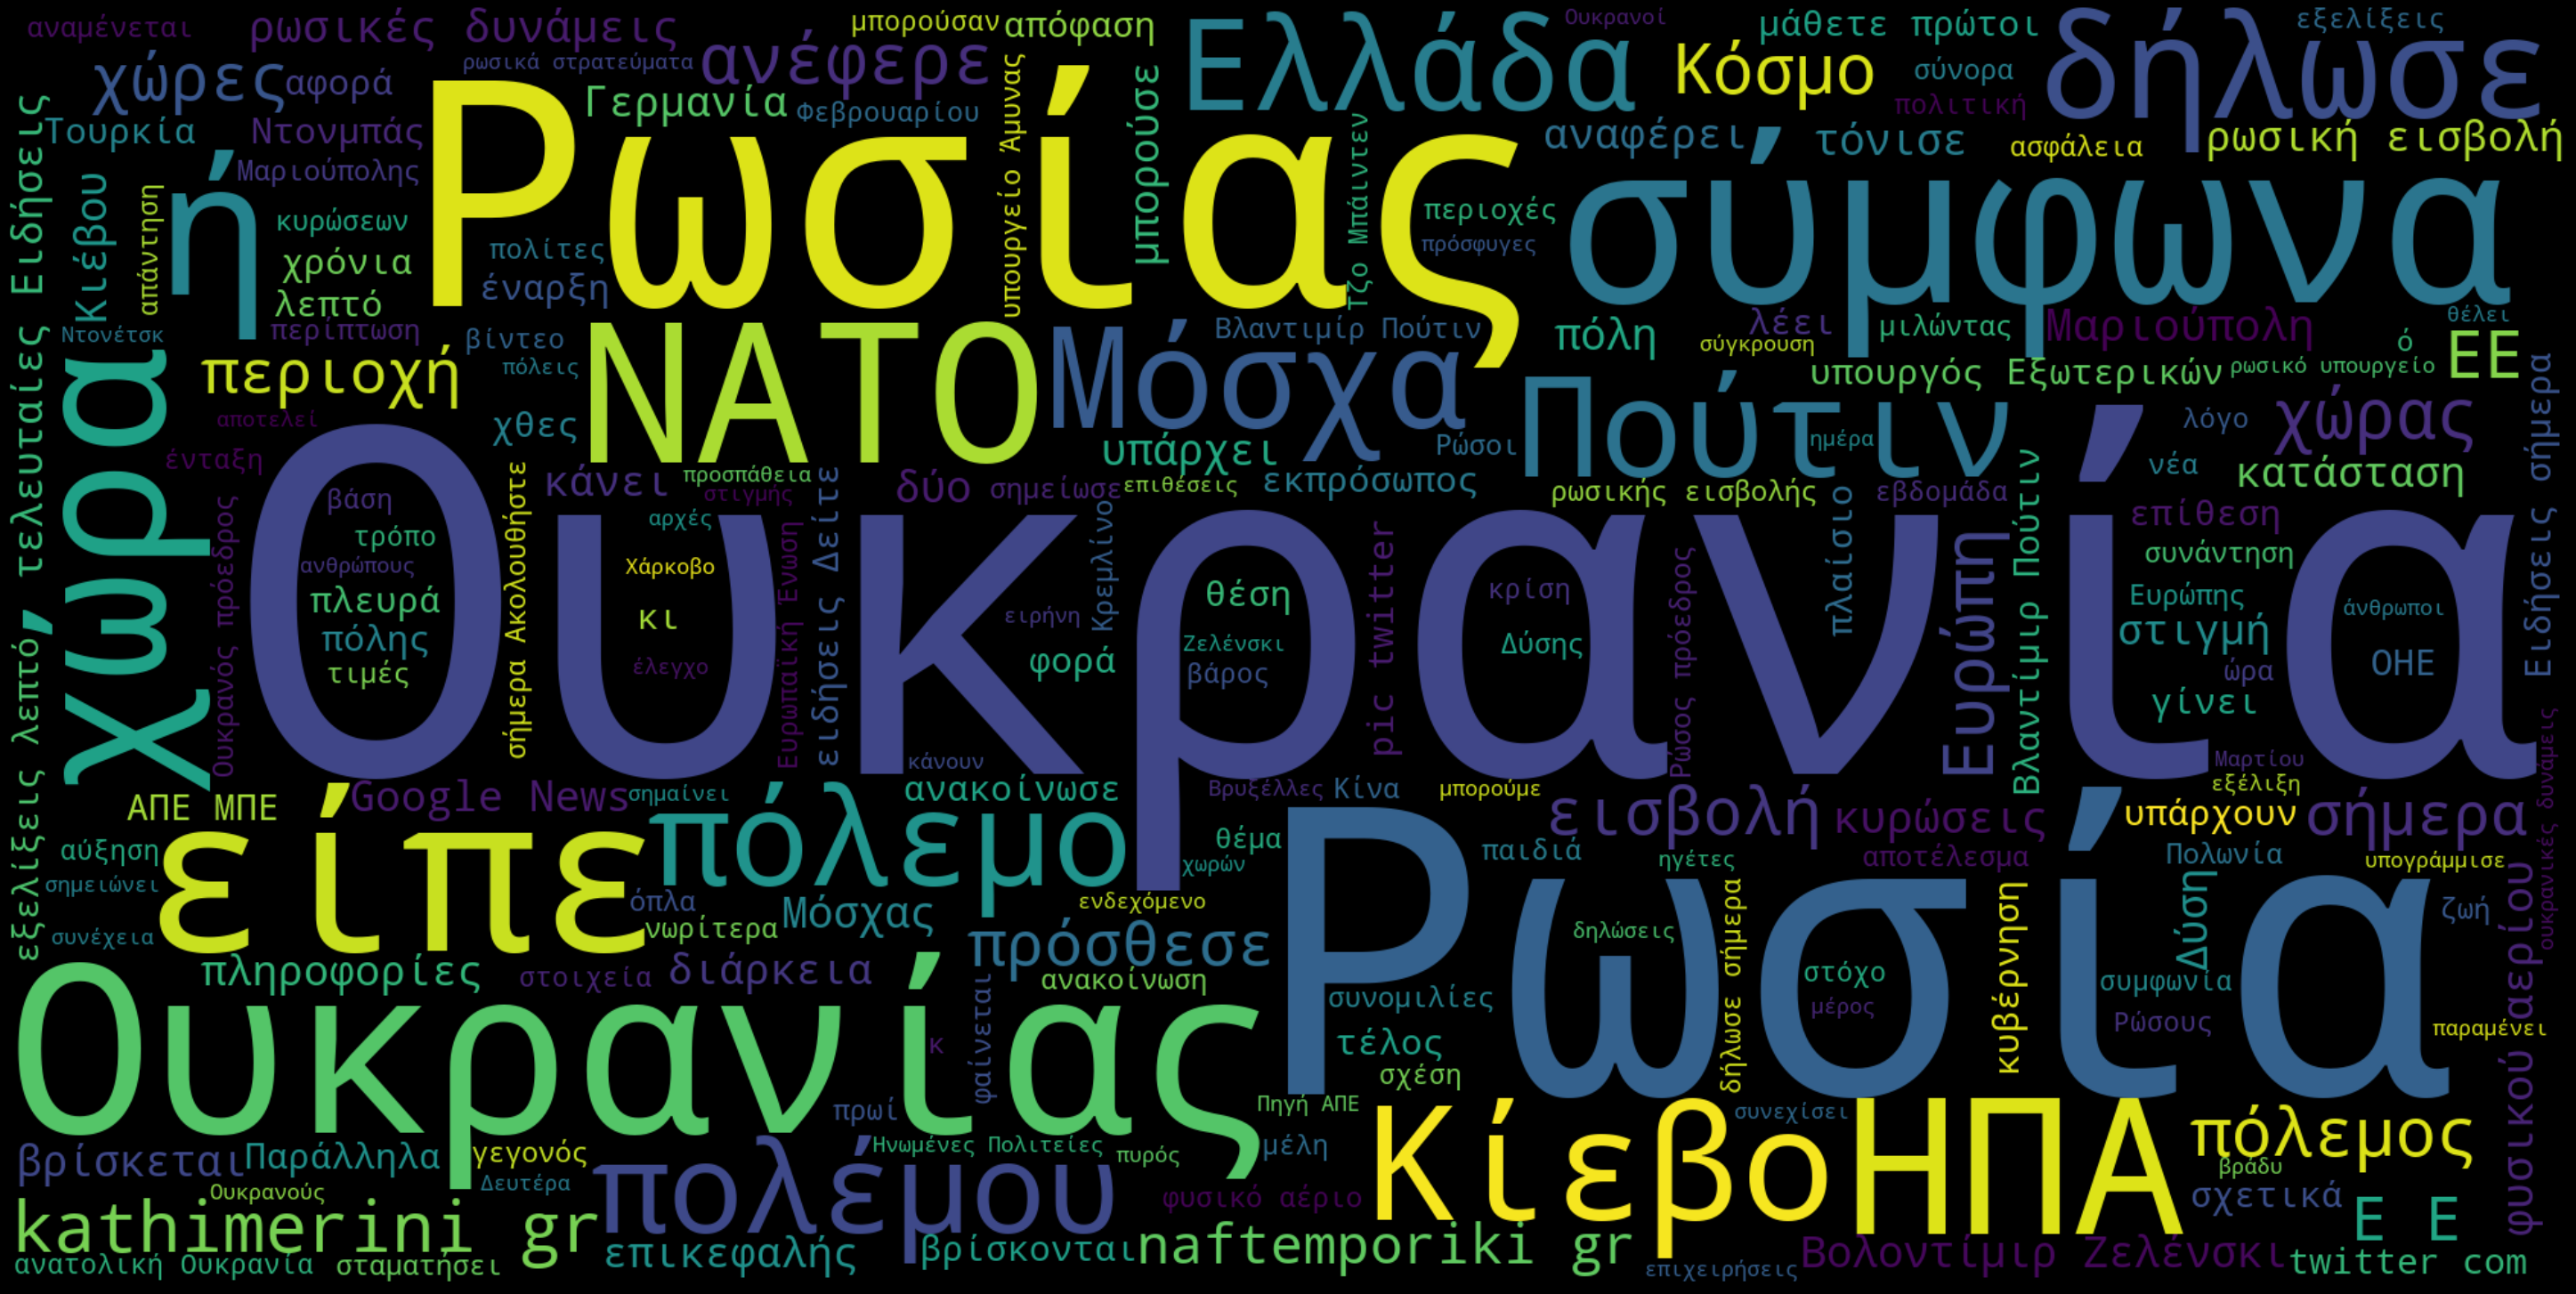

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(greek_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
full_words = nlp(war_df['Text'][1])
lemma_words = ' '.join(token.lemma_ for token in full_words)

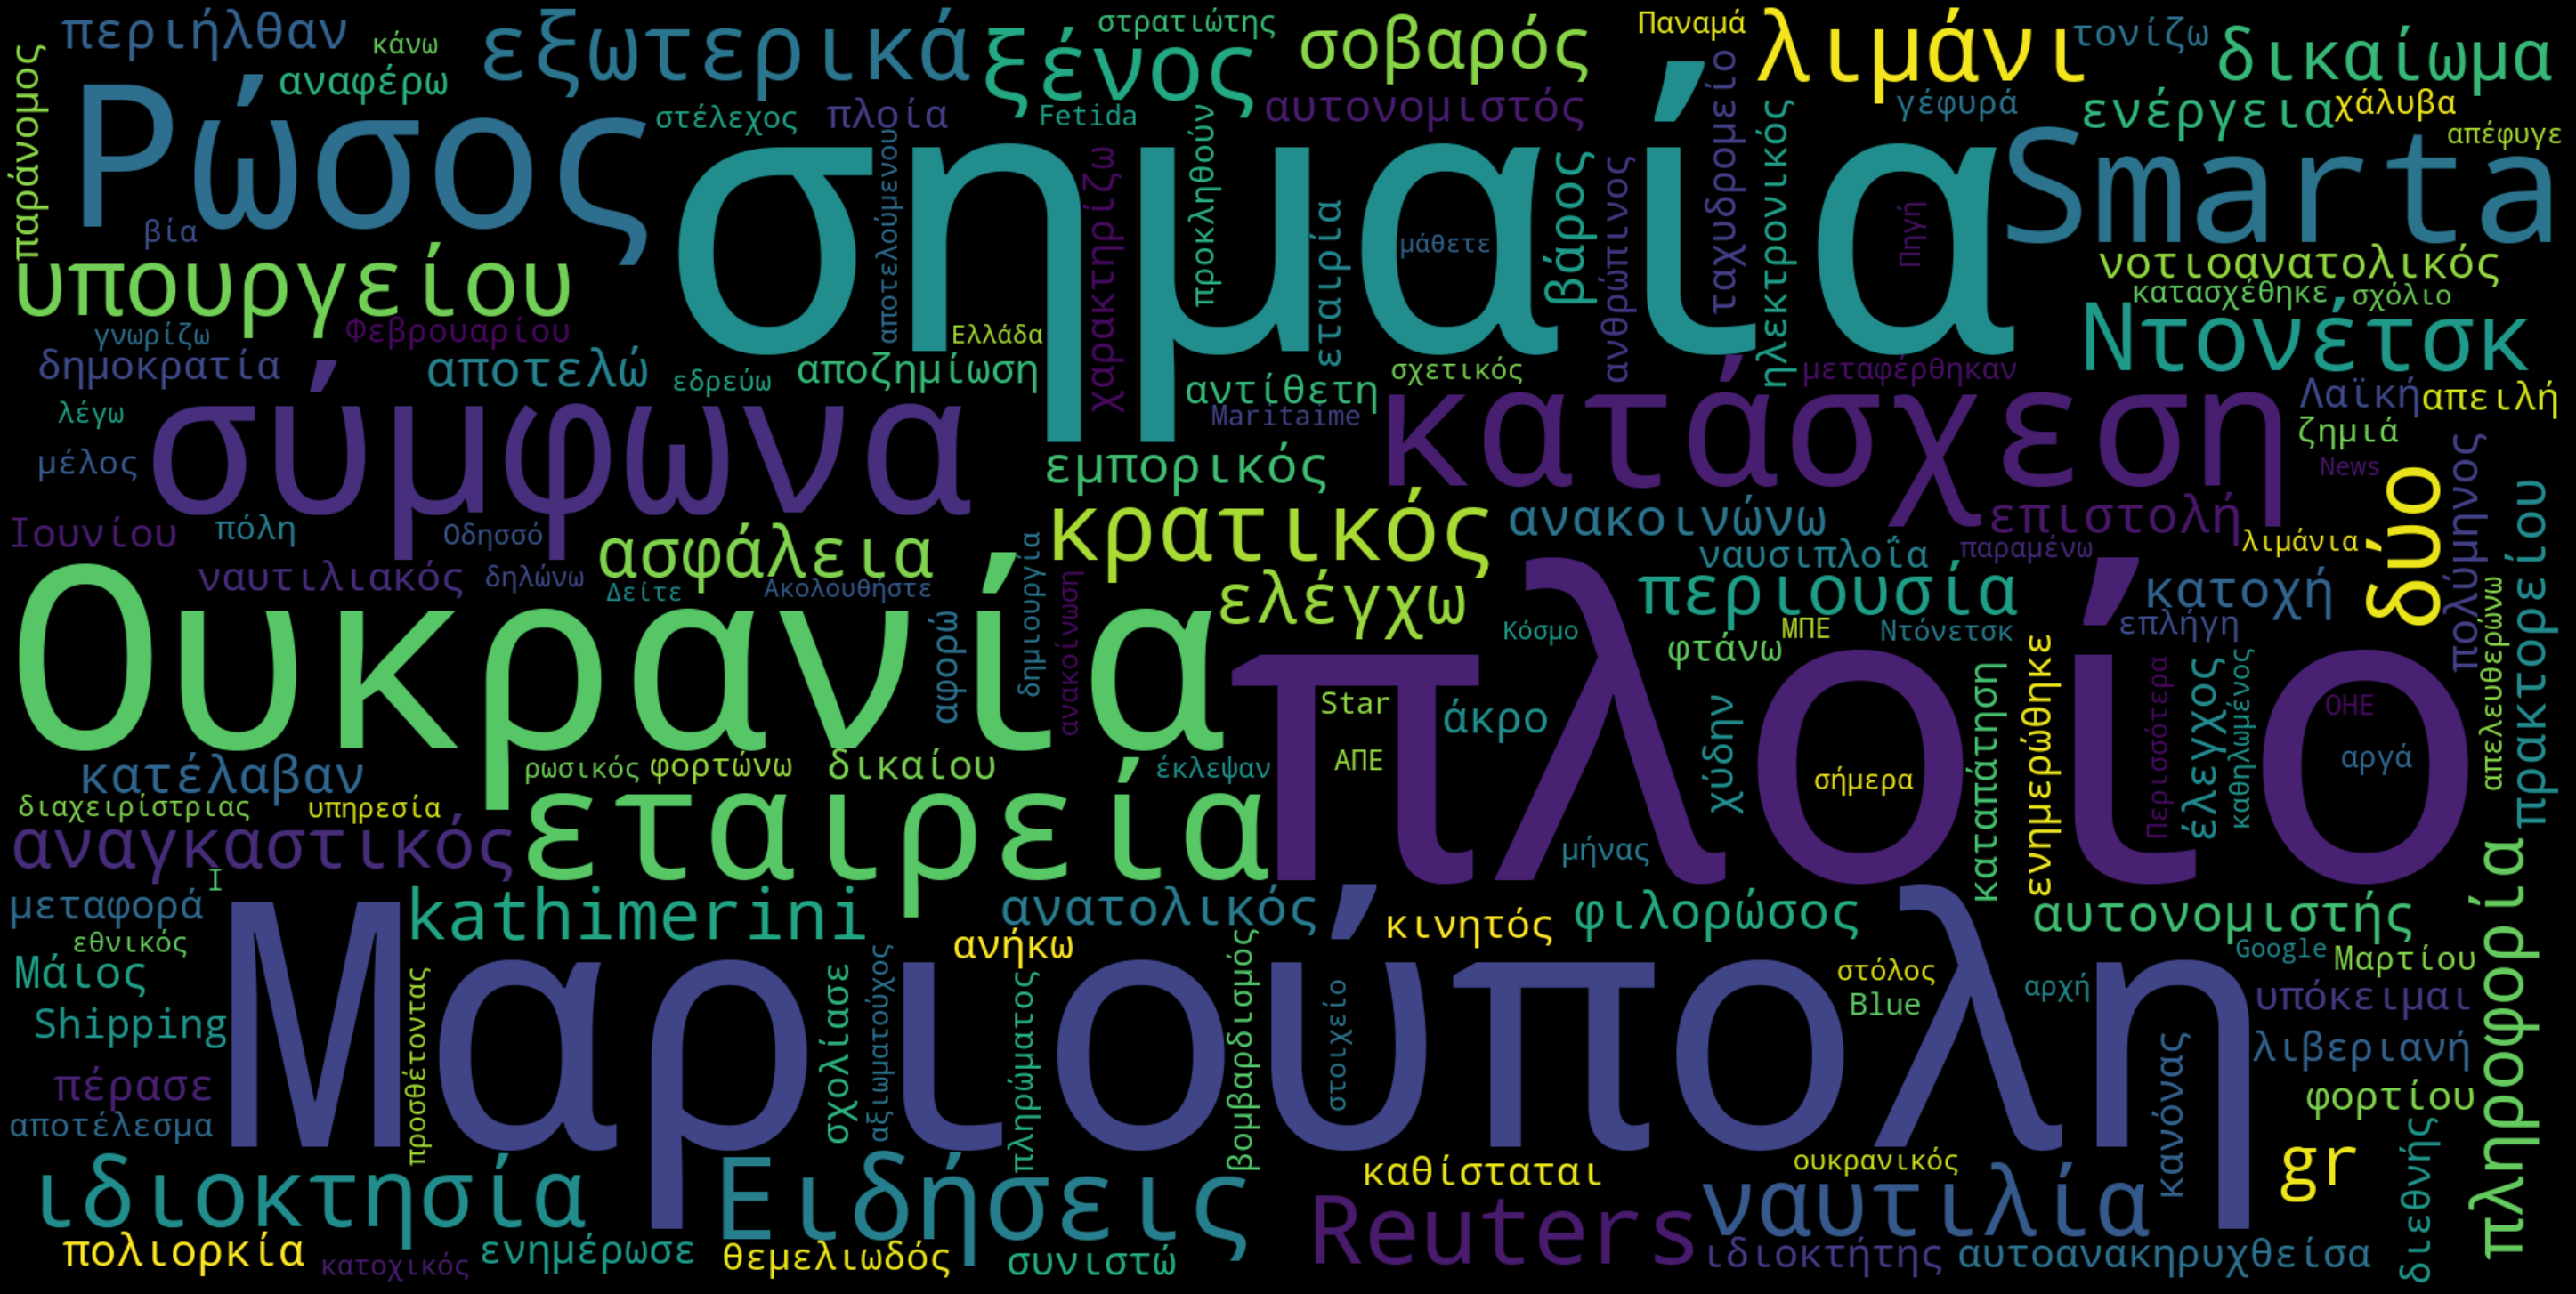

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemma_words)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()